In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('cancer.csv')
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# MetaData

#### 1) ID number
#### 2) Diagnosis (M = malignant, B = benign)
#### 3-32)

#### Ten real-valued features are computed for each cell nucleus:

####  a) radius (mean of distances from center to points on the perimeter)
#### b) texture (standard deviation of gray-scale values)
#### c) perimeter
#### d) area
#### e) smoothness (local variation in radius lengths)
#### f) compactness (perimeter^2 / area - 1.0)
#### g) concavity (severity of concave portions of the contour)
#### h) concave points (number of concave portions of the contour)
#### i) symmetry
#### j) fractal dimension ("coastline approximation" - 1)



## 2. Tabulate and visualize the distribution of the numeric variables.

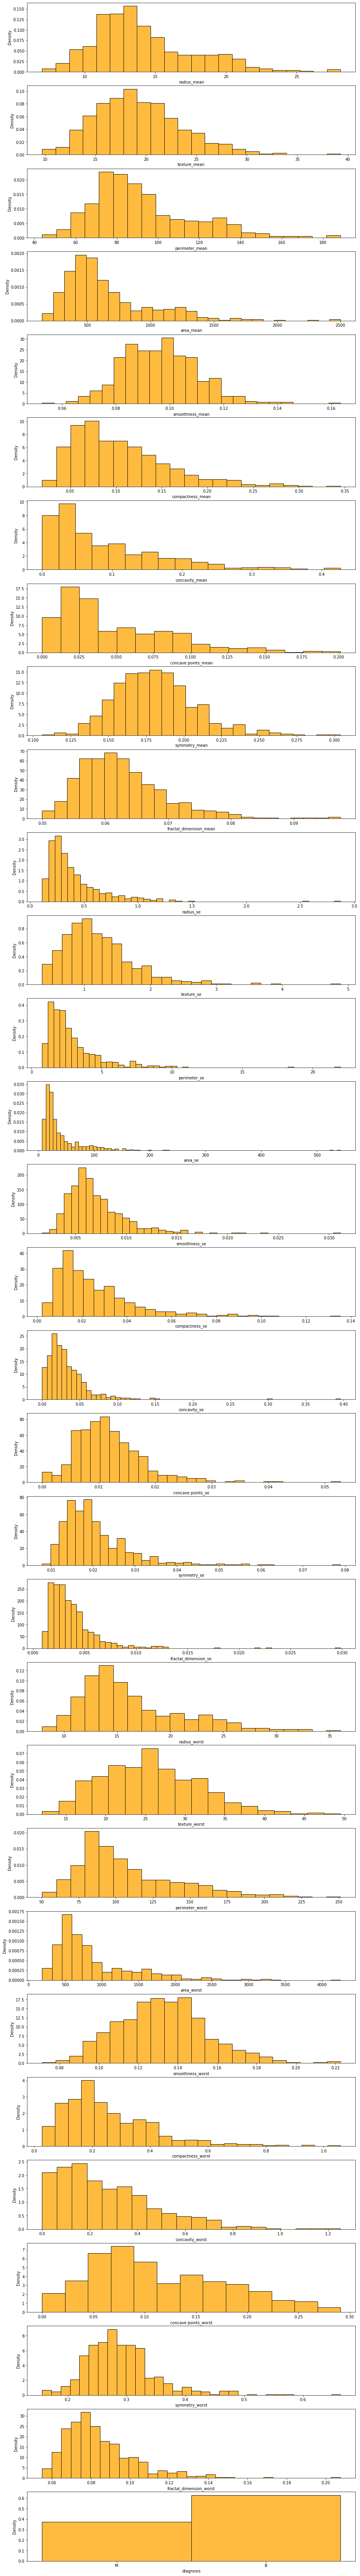

<Figure size 432x288 with 0 Axes>

In [3]:
fig, axes = plt.subplots(31, 1, figsize=(15,120))

for col in df.columns:
    idx = df.columns.get_loc(col)
    #print(type(idx))
    sns.histplot(ax=axes[idx-1],data=df, x=df[col], color = 'orange', stat='density')
    #sns.scatterplot(data=df,  x=df[col], color = 'orange', ax=ax)
plt.show()
plt.subplots_adjust(left=0.1, bottom=0.2, right=1.0, top=0.9, wspace=0.4, hspace=0.4)

## 3. Perform the required preprocessing , 70,30 split and build a classifier using the SVM model available in SciKit Learn.

## 4. Tune the hyperparameters of kernel (linear, polynomial, and radial basis), regularization and gamma. Tabulate the model performance and comment on the best model found for the given dataset.


In [4]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [5]:
sc = StandardScaler()
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [6]:
#finding VIF values
vif = pd.DataFrame()
vif['columns'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values('VIF', ascending=False)

,columns,VIF
0,radius_mean,63306.172036
2,perimeter_mean,58123.586079
20,radius_worst,9674.742602
22,perimeter_worst,4487.781270
3,area_mean,1287.262339
23,area_worst,1138.759252
9,fractal_dimension_mean,629.679874
29,fractal_dimension_worst,423.396723
4,smoothness_mean,393.398166
24,smoothness_worst,375.597155


In [7]:
# dropping area and perimeter related features as radius gives the same information
df.drop(['perimeter_mean', 'area_mean','perimeter_se', 'area_se', 'perimeter_worst', 'area_worst'], axis=1, inplace=True)

# dropping the '_worst' attributes as they have higher VIF values than their '_mean' counterparts
dropcols = ['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 
            'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']

df.drop(dropcols, axis=1, inplace=True)

In [8]:
#checking correlation
df.corr()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
diagnosis,1.000000,0.730029,0.415185,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972
radius_mean,0.730029,1.000000,0.323782,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641
texture_mean,0.415185,0.323782,1.000000,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458
smoothness_mean,0.358560,0.170581,-0.023389,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607
compactness_mean,0.596534,0.506124,0.236702,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318
concavity_mean,0.696360,0.676764,0.302418,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301
concave points_mean,0.776614,0.822529,0.293464,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584
symmetry_mean,0.330499,0.147741,0.071401,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786
fractal_dimension_mean,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132
radius_se,0.567134,0.679090,0.275869,0.301467,0.497473,0.631925,0.698050,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754


In [9]:
# compactness, concavity and concave points still show multicollinearity with each other and radius
dropcols = ['concavity_mean', 'concavity_se', 'compactness_mean', 'compactness_se']
df.drop(dropcols, axis=1, inplace=True)

# the concave points attribute was not dropped since it has the highest correlation with diagnosis

##### The multicollinearity has been dealt with

In [10]:
#feature scaling the dataset using StandardScaler
X = sc.fit_transform(X)

#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#tuning hyperparameters using GridSearchCV with 10 fold cross validation
params = {'C': [0.01, 0.1, 1, 10, 100],
          'kernel': ['linear', 'poly', 'rbf'],
          'gamma': [0.001, 0.01, 0.1, 1]}

model = SVC(random_state=42)
gcv = GridSearchCV(model, params, cv=10, scoring='accuracy', verbose=2)
gcv.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.00

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy', verbose=2)

In [11]:
#best parameter combination
gcv.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [12]:
#best accuracy score 
gcv.best_score_

0.9698717948717949

In [13]:
#fitting the classifier with best parameters
clf = SVC(C=0.1, gamma=0.001, kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#checking accuracy
accuracy_score(y_test, y_pred)

0.9824561403508771

In [14]:
#tabulating the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### The best model for the given 'cancer' dataset gives us an accuracy score of 98.2% which is really high

#### The best parameters found for the given model are:

- Best kernel is 'linear'
- Best gamma is 0.001
- Best regularization value(C) is 0.1